# Data Modeling

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gcv, cross_val_score as cvs 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
path="D:/Untar/Project/Tableau/Income Classification/Income_Evaluation_V2.csv"
ice= pd.read_csv(path, skipinitialspace=True, index_col=0)
ice.head()

,age,workclass,education,marital status,occupation,relationship,race,sex,hours per week,native country,income,c,Occupation_Level,generation
0,39,State gov,undergraduate,single,Adm clerical,Not in family,White,Male,40,United-States,<=50K,United States,Mid Level,Young Adult
1,50,Self emp not inc,undergraduate,married,Exec managerial,Husband,White,Male,13,United-States,<=50K,United States,High Level,Adult
2,38,Private,School graduate,single,Handlers cleaners,Not in family,White,Male,40,United-States,<=50K,United States,Low Level,Young Adult
3,53,Private,School graduate,married,Handlers cleaners,Husband,Black,Male,40,United-States,<=50K,United States,Low Level,Adult
4,28,Private,undergraduate,married,Prof specialty,Wife,Black,Female,40,Cuba,<=50K,Cuba,High Level,Young Adult


In [3]:
ice.columns

Index(['age', 'workclass', 'education', 'marital status', 'occupation',
       'relationship', 'race', 'sex', 'hours per week', 'native country',
       'income', 'c', 'Occupation_Level', 'generation'],
      dtype='object')

In [4]:
ice_mdl = ice [['age', 'workclass','education', 'marital status', 'occupation', 'race', 'sex', 'hours per week', 'Occupation_Level']]
x = pd.get_dummies(ice_mdl)
x.head()

,age,hours per week,workclass_Federal gov,workclass_Local gov,workclass_Private,workclass_Self emp inc,workclass_Self emp not inc,workclass_State gov,workclass_Without pay,education_School graduate,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,Occupation_Level_High Level,Occupation_Level_Low Level,Occupation_Level_Mid Level
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,38,40,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,53,40,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           30162 non-null  int64
 1   hours per week                30162 non-null  int64
 2   workclass_Federal gov         30162 non-null  uint8
 3   workclass_Local gov           30162 non-null  uint8
 4   workclass_Private             30162 non-null  uint8
 5   workclass_Self emp inc        30162 non-null  uint8
 6   workclass_Self emp not inc    30162 non-null  uint8
 7   workclass_State gov           30162 non-null  uint8
 8   workclass_Without pay         30162 non-null  uint8
 9   education_School graduate     30162 non-null  uint8
 10  education_postgraduate        30162 non-null  uint8
 11  education_undergraduate       30162 non-null  uint8
 12  education_vocational          30162 non-null  uint8
 13  marital status_married        3

In [6]:
y = ice['income']

In [7]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=101)

In [8]:
x

,age,hours per week,workclass_Federal gov,workclass_Local gov,workclass_Private,workclass_Self emp inc,workclass_Self emp not inc,workclass_State gov,workclass_Without pay,education_School graduate,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,Occupation_Level_High Level,Occupation_Level_Low Level,Occupation_Level_Mid Level
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,38,40,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,53,40,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
32557,40,40,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
32558,58,40,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
32559,22,20,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1


## Preproprecessing

In [9]:
mms = MinMaxScaler()
ice[['age', 'hours per week']] = mms.fit_transform(ice[['age', 'hours per week']])

In [10]:
ice

,age,workclass,education,marital status,occupation,relationship,race,sex,hours per week,native country,income,c,Occupation_Level,generation
0,0.301370,State gov,undergraduate,single,Adm clerical,Not in family,White,Male,0.397959,United-States,<=50K,United States,Mid Level,Young Adult
1,0.452055,Self emp not inc,undergraduate,married,Exec managerial,Husband,White,Male,0.122449,United-States,<=50K,United States,High Level,Adult
2,0.287671,Private,School graduate,single,Handlers cleaners,Not in family,White,Male,0.397959,United-States,<=50K,United States,Low Level,Young Adult
3,0.493151,Private,School graduate,married,Handlers cleaners,Husband,Black,Male,0.397959,United-States,<=50K,United States,Low Level,Adult
4,0.150685,Private,undergraduate,married,Prof specialty,Wife,Black,Female,0.397959,Cuba,<=50K,Cuba,High Level,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,vocational,married,Tech support,Wife,White,Female,0.377551,United-States,<=50K,United States,Mid Level,Young Adult
32557,0.315068,Private,School graduate,married,Machine op inspct,Husband,White,Male,0.397959,United-States,>50K,United States,Mid Level,Young Adult
32558,0.561644,Private,School graduate,single,Adm clerical,Unmarried,White,Female,0.397959,United-States,<=50K,United States,Mid Level,Elder
32559,0.068493,Private,School graduate,single,Adm clerical,Own child,White,Male,0.193878,United-States,<=50K,United States,Mid Level,Young


## KNN Prediction

In [11]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors':np.arange(1, 21, 1)}
grid_knn = gcv(estimator=knn, param_grid=param_knn, cv=10)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [17]:
print ("Parameter : ", grid_knn.best_params_)
print ("Score     : ", grid_knn.best_score_)

Parameter :  {'n_neighbors': 14}
Score     :  0.8057590650704103


              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      6743
        >50K       0.67      0.49      0.57      2306

    accuracy                           0.81      9049
   macro avg       0.76      0.70      0.72      9049
weighted avg       0.80      0.81      0.80      9049



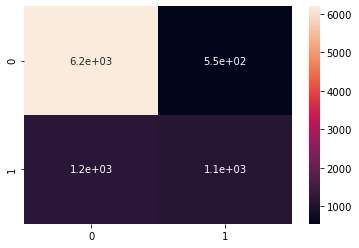

In [13]:
knn_pred = grid_knn.best_estimator_.predict(x_test)
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)
plt.show()

## Logistic Regression

In [15]:
lr = LogisticRegression(max_iter = 1000)
cv = kFold(n_splits=10, random_state=1, shuffle=True)
cv_result = cvs(lr, x, y, cv=10, scoring='accuracy')
print(cv_result.mean())

0.8238183230482615


## Random Forest

In [24]:
rfc = RandomForestClassifier()
param_rfc = {'n_estimators': np.arange(100, 501, 100)}
grid_rfc =gcv(estimator=rfc, param_grid=param_rfc, cv=10, scoring='accuracy')
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='accuracy')

In [25]:
print ("Parameter : ", grid_knn.best_params_)
print ("Score     : ", grid_knn.best_score_)

Parameter :  {'n_neighbors': 14}
Score     :  0.8057590650704103
